#Final Project: Analysis of U.S. Tariff Data
### Ilina Jha and Jackson Wurzer


Narrative:

We located our data from the United States International Trade Comission's Harmonized Tariff Schedule. The link is: https://hts.usitc.gov/. We found excel files with tariff data for each individual year and decided to focus on data from 2018 up to the present. You will need to download each of the excel files and upload them to the local Colab environment to use our code. In various parts of our code below, we had to wrangle the data, mainly dealing with null values. We also found an issue in various columns where the tariff rate was listed as '9999.999999'. Researching this, it appears that this is some sort of place-holder, or missing value. We weren't able to locate any notes on the HTS website that explained this but we assume it may be somewhere. We wish this was clearer.

Our main visualizations were bar charts which reflected the goods with the highest average tariff rates from 2018-2025. We constructed bar charts for tariff rates placed on MFN (most favored nations) and non-MFN's. We concatenated the data frames for every year into one. We obtained the first four digits of the eight-digit HTS8 code and used that to group the products (called these groups categories). Then we took the mean and sorted the values and plotted the results. A sample visualization is pasted below (includes only the top five goods):

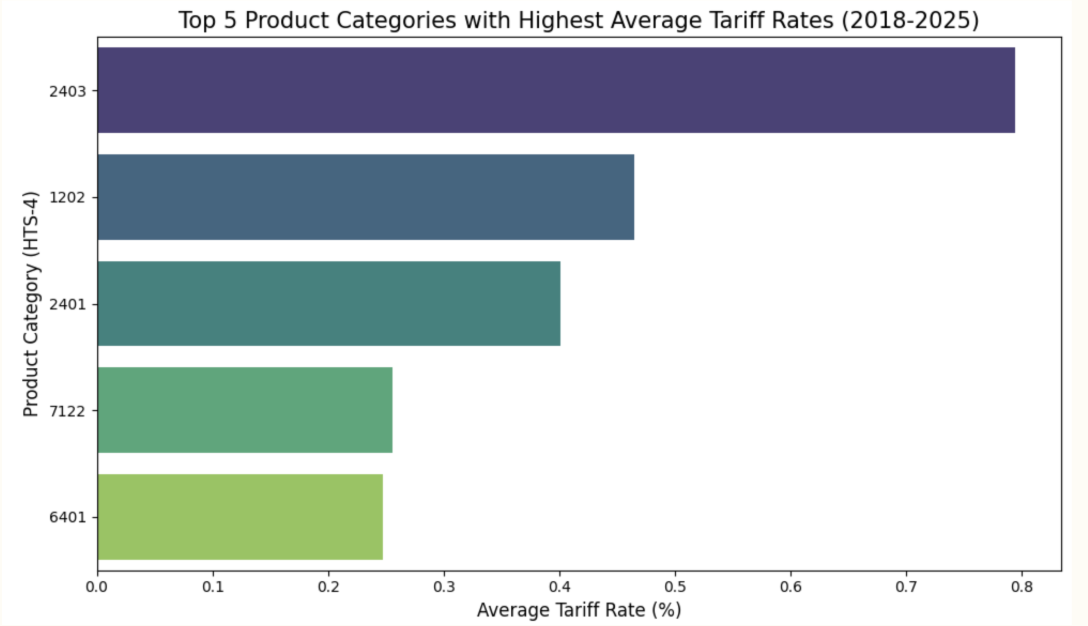

We also learned and applied new techniques to answer questions about this data. The first technique we used was decision trees. We learned about this technique from the W3 schools websited which also helped us to implement the actual code. We used this to try and predict the tariff rates of non-MFN countries using MFN tariff rates, the category of the good, and the year. The second new technique we used was a new form of visualization -- a bubble chart. This showed how many goods fell into each category. We used Stack Overflow to assist with the implementation of this code. We also used Chat GPT to help with errors we encountered for our first question when we were tryinig to group by category and concatenate the data frames.

Both Ilina and Jackson worked on locating and processing the data, as well as coming up with interesting questions to try and answer. Jackson worked on questions 1, 4, and 5. Ilina worked on questions 2, 3, and 6.




Sources:

W3Schools: https://www.w3schools.com/python/python_ml_decision_tree.asp

Stack Overflow:
https://stackoverflow.com/questions/65878921/how-to-make-a-bubble-graph-using-seaborn

ChatGPT: https://chatgpt.com/

## Part 1: Choosing a topic and finding data

The link to the specific data we used is here: https://dataweb.usitc.gov/tariff/annual.


## Part 2: Conduct your Analysis & Visualization


In [11]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [12]:
# Import data
df_2018 = pd.read_excel('/content/tariff_database_2018.xlsx')
df_2019 = pd.read_excel('/content/tariff_database_2019.xlsx')
df_2020 = pd.read_excel('/content/tariff_database_2020.xlsx')
df_2021 = pd.read_excel('/content/tariff_database_2021.xlsx')
df_2022 = pd.read_excel('/content/tariff_database_2022.xlsx')
df_2023 = pd.read_excel('/content/tariff_database_2023.xlsx')
df_2024 = pd.read_excel('/content/tariff_database_2024.xlsx')
df_2025 = pd.read_excel('/content/tariff_database_2025.xlsx')
df_2025.head()

,hts8,brief_description,quantity_1_code,quantity_2_code,wto_binding_code,mfn_text_rate,mfn_rate_type_code,mfn_ave,mfn_ad_val_rate,mfn_specific_rate,...,japan_indicator,japan_rate_type_code,japan_ad_val_rate,japan_specific_rate,japan_other_rate,usmca_indicator,usmca_rate_type_code,usmca_ad_val_rate,usmca_specific_rate,usmca_other_rate
0,1012100,Live purebred breeding horses,NO,NaN,B,Free,0,NaN,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1012900,Live horses other than purebred breeding horses,NO,NaN,B,Free,0,NaN,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1013000,Live asses,NO,NaN,B,6.8%,7,NaN,0.068,0.0,...,NaN,NaN,NaN,NaN,NaN,S,0.0,0.0,0.0,0.0
3,1019030,Mules and hinnies imported for immediate slaug...,NO,NaN,B,Free,0,NaN,0.000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1019040,Mules and hinnies not imported for immediate s...,NO,NaN,B,4.5%,7,NaN,0.045,0.0,...,NaN,NaN,NaN,NaN,NaN,S,0.0,0.0,0.0,0.0


# Description of the variables:

hts8: 8-digit Harmonized Tariff Schedule code; use to group or identify products

mfn_ad_val_rate: Ad valorem MFN (most favored nations) rate: tariff rate as a percentage of the value of the good.

col2_ad_val_rate: Ad valorem tariff rate for non-MFN countries.

japan_ad_val_rate: Ad valorem portion of the Japan duty rate (.05 = 5%)

mfn_rate_type_code: Duty code for tariff calculation

1. What goods have the highest tariff rates?

Here we will look from 2018 to 2025. We will use the first 4 digits of the HTS code to group into categories. We want to look at the most favored nations (MFN) ad valorem tariff rates ('mfn_ad_val_rate') for each of these categories and see which goods have the highest rates. We found in the data that the value 9999.999 is used as some sort of placeholder for missing data or a note on the HTS website (difficult to find this information). We have gotten rid of these extreme values and made a new data frame. We then combined all the years' data into a single data frame. We then calculated the average tariff rates and made a bar chart with a key to include descriptions for each of the HTS codes.

<ipython-input-13-3e7ea107015d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = year
<ipython-input-13-3e7ea107015d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['hts8'].astype(str).str[:4]
<ipython-input-13-3e7ea107015d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mfn_ad_val_rate', y='category', data=top_cats_d

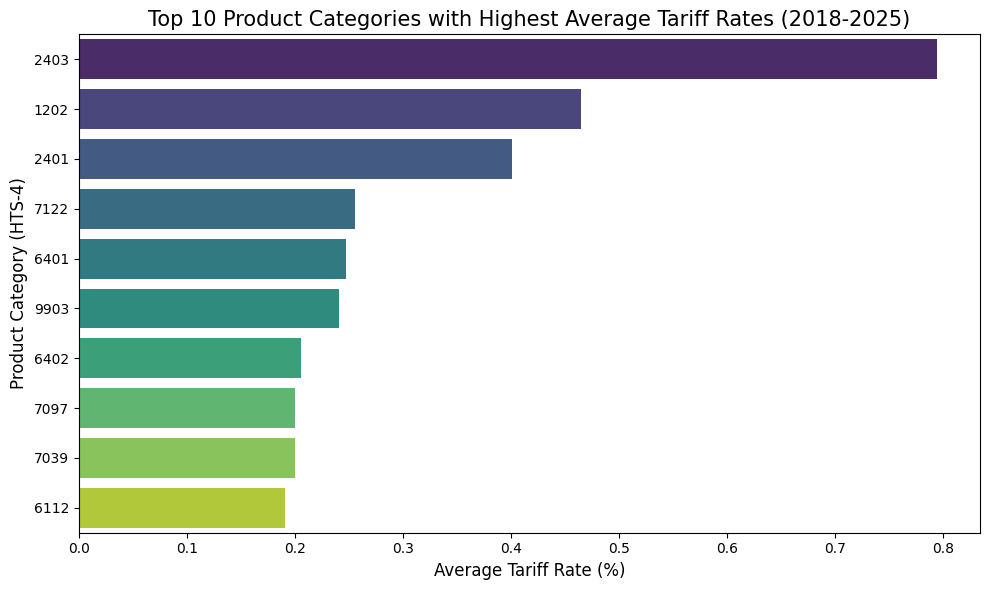

Key to HTS-4 Product Categories:
Category 2403: Water pipe tobacco, whether or not containing tobacco substitutes
Category 1202: Peanuts (ground-nuts), seed, not roasted or cooked, shelled, subject to gen note 15 of the HTS
Category 2401: Wrapper tobacco, not stemmed/stripped
Category 7122: Dried onion powder or flour
Category 6401: Waterproof footwear, not mechanically assembled, w/outer soles & uppers of rubber or plastics, w/metal toecap
Category 9903: Household-type (residential) washing machines provided for in 84501100 or 84502000 from certain countries not exceeding 1.2 mil units
Category 6402: Ski-boots, cross-country ski footwear and snowboard boots, w/outer soles and uppers of rubber or plastics
Category 7097: Spinach, New Zealand spinach and orache spinach (garden spinach), fresh or chilled
Category 7039: Leeks and other alliaceous vegetables nesoi, fresh or chilled
Category 6112: Track suits, knitted or crocheted, of cotton


In [13]:
# Extract category and process all years of data
all_dfs = []
dfs = [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024, df_2025]
years = range(2018, 2026)

for df, year in zip(dfs, years):
    df = df[df['mfn_ad_val_rate'] <= 9999]
    df = df[df['col2_ad_val_rate'] <= 9999]
    df['year'] = year
    df['category'] = df['hts8'].astype(str).str[:4]
    df = df[['hts8', 'category', 'mfn_ad_val_rate', 'brief_description', 'col2_ad_val_rate','year']]
    all_dfs.append(df)

# Combine all years into one dataframe
combined_df = pd.concat(all_dfs, ignore_index=True)

# Get top 10 categories with highest average tariff rates
category_avg = combined_df.groupby('category')['mfn_ad_val_rate'].mean().sort_values(ascending=False)
top_cats = category_avg.head(10).index.tolist()

# Plot bar chart of top categories
plt.figure(figsize=(10, 6))
top_cats_df = combined_df[combined_df['category'].isin(top_cats)]
top_cats_df = top_cats_df.groupby('category')['mfn_ad_val_rate'].mean().reset_index()
top_cats_df = top_cats_df.sort_values('mfn_ad_val_rate', ascending=False)

sns.barplot(x='mfn_ad_val_rate', y='category', data=top_cats_df, palette='viridis')
plt.title('Top 10 Product Categories with Highest Average Tariff Rates (2018-2025)', fontsize=15)
plt.xlabel('Average Tariff Rate (%)', fontsize=12)
plt.ylabel('Product Category (HTS-4)', fontsize=12)
plt.tight_layout()
plt.show()

# Create a key for the top categories
print("Key to HTS-4 Product Categories:")
print("=" * 50)
for cat in top_cats:
    example = combined_df[combined_df['category'] == cat]['brief_description'].iloc[0] # Get one example product for each category
    print(f"Category {cat}: {example}")
print("=" * 50)

2. What percentage of goods are duty-free? (i.e. MFN ad valorem tariff rate = 0%).

In [14]:
# Data Wrangling
# Combine dataframes for hts 8 and relevant variables for 2024 and 2025
df_2024_hts8 = df_2024[['hts8', 'mfn_ad_val_rate', 'brief_description']]
df_2025_hts8 = df_2025[['hts8', 'mfn_ad_val_rate', 'brief_description']]

df_hts8 = pd.concat([df_2024_hts8, df_2025_hts8])
df_hts8.head()

,hts8,mfn_ad_val_rate,brief_description
0,1012100,0.000,Live purebred breeding horses
1,1012900,0.000,Live horses other than purebred breeding horses
2,1013000,0.068,Live asses
3,1019030,0.000,Mules and hinnies imported for immediate slaug...
4,1019040,0.045,Mules and hinnies not imported for immediate s...


In [15]:
# What percentage of goods are duty-free? (i.e. MFN ad valorem tariff rate = 0%) across 2024 and 2025 from the new dataframe
duty_free_count = (df_hts8['mfn_ad_val_rate'] == 0).sum()
total_count = len(df_hts8)
percentage_duty_free = (duty_free_count / total_count) * 100
print(f"Percentage of goods that are duty-free: {percentage_duty_free:.2f}%")

Percentage of goods that are duty-free: 44.71%


3. Understand how different tariff rates (MFN and Japan) correlate across goods.
Are the MFN tariffs generally aligned with Japan rates?


In [16]:
#Combine relvant 2024-25 dataframes parse the data with hts codes and include different counties ad val rate
df_2024_hts8_trade = df_2024[['hts8', 'mfn_ad_val_rate', 'brief_description', 'usmca_ad_val_rate', 'japan_ad_val_rate']]
df_2025_hts8_trade = df_2025[['hts8', 'mfn_ad_val_rate', 'brief_description', 'usmca_ad_val_rate', 'japan_ad_val_rate']]

df_hts8_trade = pd.concat([df_2024_hts8_trade, df_2025_hts8_trade])
df_hts8_trade.head()

,hts8,mfn_ad_val_rate,brief_description,usmca_ad_val_rate,japan_ad_val_rate
0,1012100,0.000,Live purebred breeding horses,NaN,NaN
1,1012900,0.000,Live horses other than purebred breeding horses,NaN,NaN
2,1013000,0.068,Live asses,0.0,NaN
3,1019030,0.000,Mules and hinnies imported for immediate slaug...,NaN,NaN
4,1019040,0.045,Mules and hinnies not imported for immediate s...,0.0,NaN


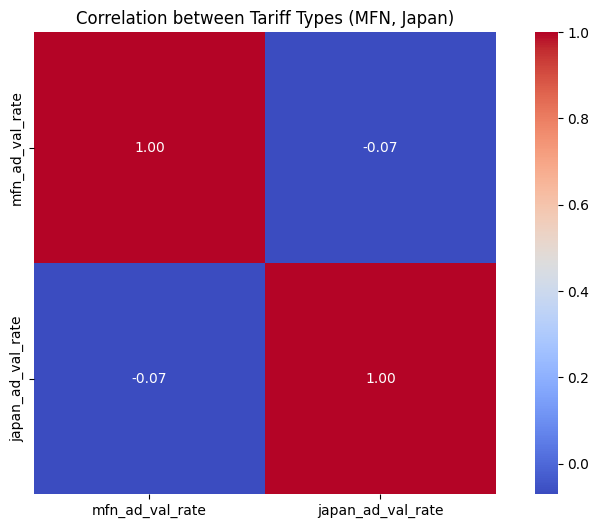

In [17]:
# Impute missing values in 'usmca_ad_val_rate' with the mean
df_hts8_trade['usmca_ad_val_rate'] = df_hts8_trade['usmca_ad_val_rate'].fillna(df_hts8_trade['usmca_ad_val_rate'].mean())

#Understand how different tariff rates (MFN, Japan, USMCA) correlate across goods.
cols_of_interest = [
    'mfn_ad_val_rate',
    'japan_ad_val_rate',
]

# Assuming you want to use df_hts8_trade, replace df with df_hts8_trade
df_numeric = df_hts8_trade[cols_of_interest]

# Recalculate the correlation matrix with the updated df_numeric
corr_matrix = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation between Tariff Types (MFN, Japan)')
plt.show()

The correlation between mfn_ad_val_rate and japan_ad_val_rate was found to be -0.07, indicating virtually no linear relationship. This suggests that Japan’s tariff structure is largely independent of the Most Favored Nation (MFN) schedule, at least in terms of ad valorem rates. In other words, goods that are duty-free or highly taxed under the MFN regime may not receive similar treatment under Japan’s tariff system.

This divergence could reflect Japan’s distinct trade strategy or sector-specific agreements. For example, Japan might offer lower tariffs on certain goods that are prioritized under bilateral or regional trade agreements, even if they face high MFN rates.



4. What are some of the products with the highest average tariff rates for non-MFN countries? How does this compare to products that have the highest rates for MFN rates (#1 above).

<ipython-input-18-83504c47def3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='col2_ad_val_rate', y='category', data=top_cats_df, palette='viridis')


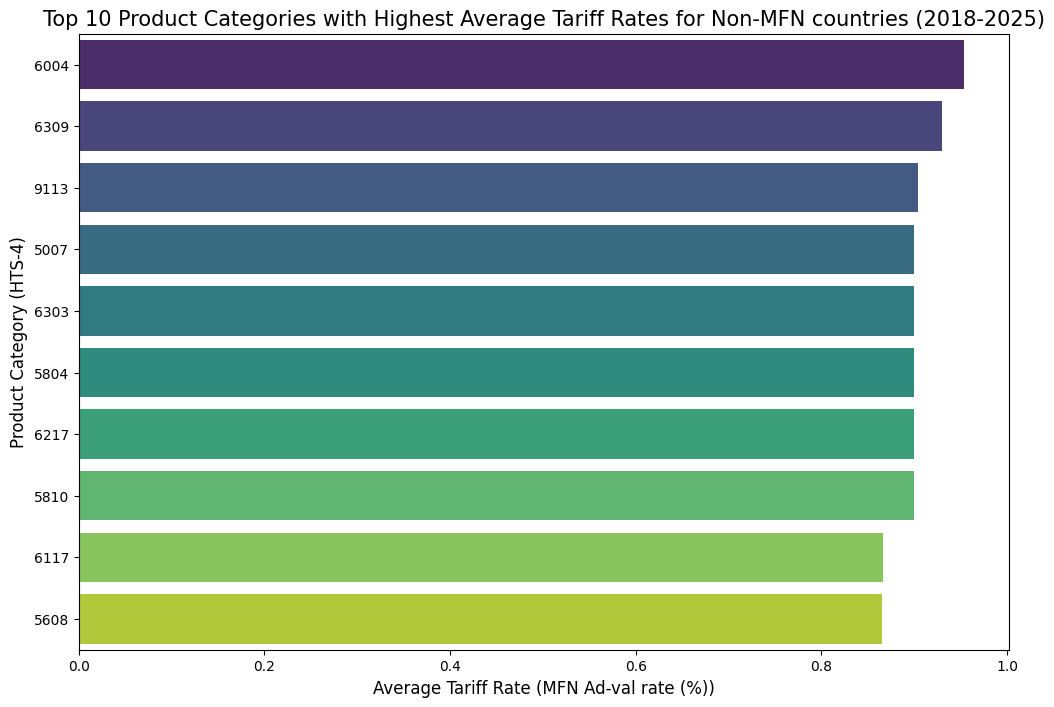

Key to HTS-4 Product Categories:
Category 6004: Knitted or crocheted fabrics, width exceeding 30 cm, containing 5% or more of elastomeric yarn but no rubber thread, not of heading 6001
Category 6309: Worn clothing and other worn articles
Category 9113: Watch straps, watch bands and watch bracelets, of precious metal or of metal clad with precious metal, and parts thereof
Category 5007: Woven fabrics of noil silk, containing 85 percent or more by weight of silk or silk waste
Category 5804: Tulles and other net fabrics (not including woven, knitted or crocheted fabrics) of cotton or man-made fibers
Category 6217: Made up clothing accessories(excl those of heading 6212), containing 70% or more by weight of silk or silk waste, not knitted or crocheted
Category 6303: Curtains (including drapes), interior blinds and valances of synthetic fibers, knitted or crocheted
Category 5810: Embroidery in the piece, in strips or in motifs, without visible ground
Category 6117: Shawls, scarves, mufflers

In [18]:
# Get top 10 categories with highest average tariff rates
category_avg = combined_df.groupby('category')['col2_ad_val_rate'].mean().sort_values(ascending=False)
top_cats = category_avg.head(10).index.tolist()

# Plot bar chart of top categories
plt.figure(figsize=(12, 8))
top_cats_df = combined_df[combined_df['category'].isin(top_cats)]
top_cats_df = top_cats_df.groupby('category')['col2_ad_val_rate'].mean().reset_index()
top_cats_df = top_cats_df.sort_values('col2_ad_val_rate', ascending=False)

sns.barplot(x='col2_ad_val_rate', y='category', data=top_cats_df, palette='viridis')
plt.title('Top 10 Product Categories with Highest Average Tariff Rates for Non-MFN countries (2018-2025)', fontsize=15)
plt.xlabel('Average Tariff Rate (MFN Ad-val rate (%))', fontsize=12)
plt.ylabel('Product Category (HTS-4)', fontsize=12)
plt.show()

# Create a key for the top categories
print("Key to HTS-4 Product Categories:")
print("=" * 50)
for cat in top_cats:
    example = combined_df[combined_df['category'] == cat]['brief_description'].iloc[0] # Get one example product for each category
    print(f"Category {cat}: {example}")
print("=" * 50)

4. Using the machine learning method of decision trees, how well can we predict the tariff rates of non-MFN countries using year, the category of the good, and the MFN ad-val rate as predictors?

Here col_2_ad_val reflects non_MFN countries' ad valorem tariff rates.

In [19]:
# Make copy of combined_df from 1.
df = combined_df.copy()
df = df[df['col2_ad_val_rate'] <= 9999]  # remove missing/extreme values

# Encode 'category' as a number
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

# Define features and target
X = df[['category_encoded', 'year', 'mfn_ad_val_rate']]
T = df['col2_ad_val_rate'] #

# Train-test split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)

#  Train decision tree
tree = DecisionTreeRegressor(max_depth=4, random_state=42)
tree.fit(X_train, T_train)

# Evaluate model performance
y_pred = tree.predict(X_test)
print("R² score:", round(r2_score(T_test, y_pred),2))
print("RMSE:", round(mean_squared_error(T_test, y_pred), 4))


R² score: 0.51
RMSE: 0.034


6. Create a bubble chart that shows the number of goods for each MFN rate type code in your 2025 dataset. The bubble size reflects how many goods fall into each code.

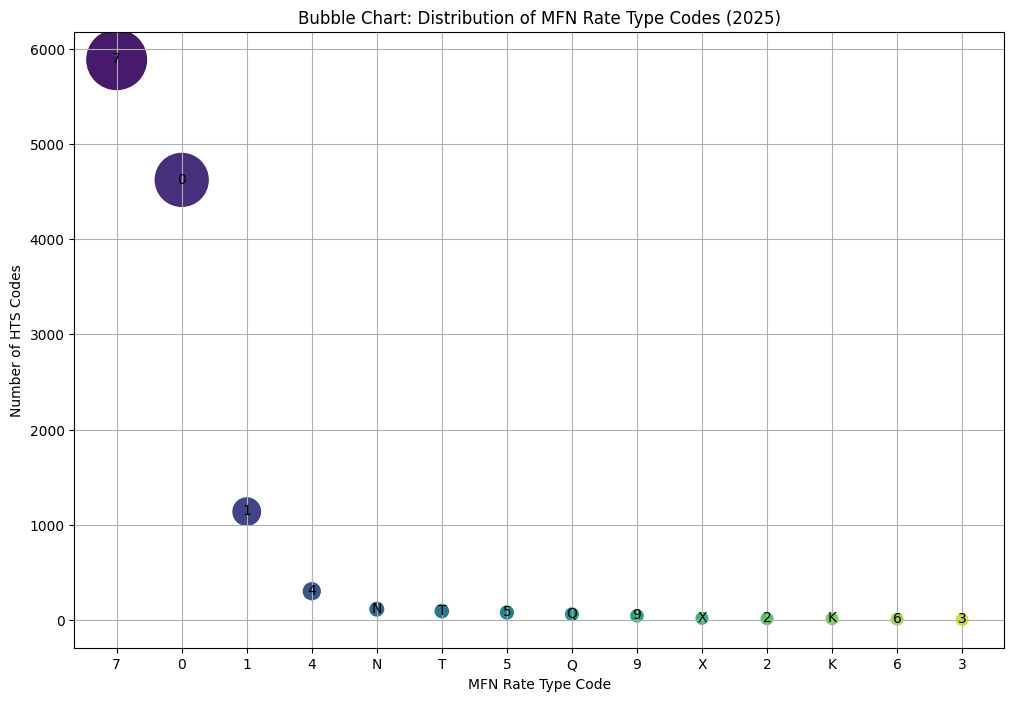

In [20]:
# Using df_2025 tariff dataset

# Count frequency of each MFN rate type code
mfn_counts = df_2025['mfn_rate_type_code'].value_counts().reset_index()
mfn_counts.columns = ['mfn_rate_type_code', 'count']

# Clean NaNs and convert code to string
mfn_counts = mfn_counts.dropna()
mfn_counts['mfn_rate_type_code'] = mfn_counts['mfn_rate_type_code'].astype(str)

# Create a bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=mfn_counts,
    x='mfn_rate_type_code',
    y='count',
    size='count',
    hue='mfn_rate_type_code',
    sizes=(100, 2000),
    legend=False,
    palette='viridis'
)

#  Annotate each bubble with its code
for i in range(len(mfn_counts)):
    plt.text(
        x=mfn_counts['mfn_rate_type_code'][i],
        y=mfn_counts['count'][i] + 10,  # slightly above the bubble
        s=mfn_counts['mfn_rate_type_code'][i],
        ha='center',
        va='center'
    )

plt.title("Bubble Chart: Distribution of MFN Rate Type Codes (2025)")
plt.xlabel("MFN Rate Type Code")
plt.ylabel("Number of HTS Codes")
plt.grid(True)
plt.show()

The bubble chart reveals that the most common MFN rate type is code 7, representing Tariff Rate Quotas (TRQs), with about 6,000 entries—indicating that a large number of goods face quantity-based preferential tariffs. Code 0, signifying duty-free or zero tariffs, follows closely with around 4,500 entries, reflecting a significant share of liberalized trade under MFN terms. Other rate types like 4, N, T, Q, and 5 appear far less frequently, suggesting they apply to more specific or exceptional trade scenarios such as temporary protections, quotas without tariffs, or compound rates. This distribution highlights the dominance of TRQs and duty-free classifications in the tariff structure and sets a foundation for deeper comparisons across years or trading partners.
